In [3]:
# 회귀분석에 필요한 라이브러리를 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
# 데이터 불러오기
df = pd.read_csv('C:/gskim/P4DS/data/ch62.csv')
df.head()  # 상단의 5개의 데이터 확인하기

,x1,x2,y
0,25,3,100
1,52,6,256
2,38,5,152
3,32,5,140
4,25,4,150


In [4]:
# padas 에서 제공하는 설명 통계
print(df.describe())

            x1         x2           y
count  10.0000  10.000000   10.000000
mean   38.2000   4.500000  170.900000
std    10.6854   1.433721   42.560937
min    25.0000   2.000000  100.000000
25%    29.0000   4.000000  150.500000
50%    39.0000   4.500000  163.500000
75%    44.2500   5.000000  194.250000
max    55.0000   7.000000  256.000000


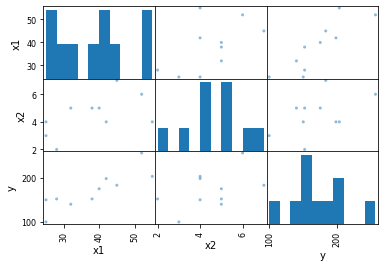

In [5]:
# Plotting data
from pandas.plotting import scatter_matrix
# scatter_matrix
%matplotlib inline
scatter_matrix(df[['x1', 'x2', 'y']])
plt.show()

In [6]:
# 회귀분석 수행
result = sm.ols(formula='y ~ x1 + x2', data=df).fit()
# 요약결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     9.659
Date:                Tue, 21 Apr 2020   Prob (F-statistic):            0.00970
Time:                        14:41:12   Log-Likelihood:                -44.550
No. Observations:                  10   AIC:                             95.10
Df Residuals:                       7   BIC:                             96.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.6892     32.742      1.212      0.2

C:\Users\gskim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


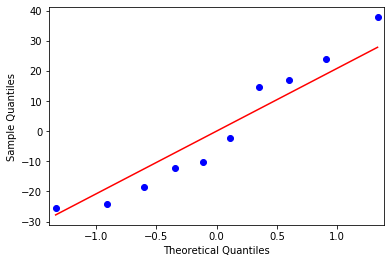

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline

# draw qqplot
res = result.resid
qq = sm.qqplot(res, line = 's')
plt.show()

In [8]:
from statsmodels.stats.outliers_influence import OLSInfluence
import numpy as np
np.linalg.cond(result.model.exog)

166.04767187449278

In [9]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 0.9948275530732875),
 ('p-value', 0.608101313691664),
 ('f-value', 0.38665516471534206),
 ('f p-value', 0.692982262425187)]

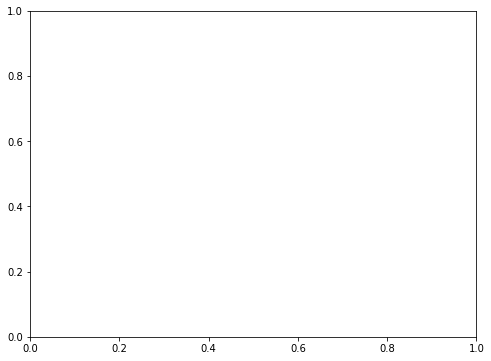

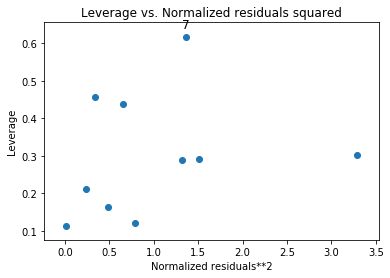

In [14]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(result, ax = ax)